<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_14/blob/main/Actividad_semana_4_equipo_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de componentes principales
### Ciencia y analítica de datos
### Jobish Vallikavungal Devassia
### Equipo 14
 * Francisco Javier Morales Jimenez A01794339
 * Alejandro García Hernández A01793812


In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#importamos los datos asignados para el ejercicio y observamos los primeros 5 registros
path='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
original = pd.read_csv(path,index_col = 0)
df = original.copy()
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


La descripción exacta de cada una de las variables así como el diccionario de datos se muestra a continuación:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
#Eliminamos de la base la columna Y ya que en la descripción de los datos nos dicen que es un campo calculado
df1=df.copy()
df1=df1.drop(columns = "Y")
#como podemos observar en la descripción de los datos, algunas variables son cualitativas y aunque están codificadas con números sería preferible omitirlas del análisis
cualitativas = ["X2","X3","X4","X6","X7","X8","X9","X10","X11"]
df1.drop(columns = cualitativas, inplace = True)
#ahora nuesra base de datos consta de 14 variables, si usamos la función corr podemos ver las correlaciones entre todas las variables, si bien,
#este formato no es muy amigable
df1.corr()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144684,0.285538,0.278410,0.283343,0.294063,0.295614,0.290475,0.195307,0.178431,0.210143,0.203256,0.217177,0.219585
X5,0.144684,1.000000,0.056357,0.054357,0.053783,0.051443,0.049401,0.047706,0.025978,0.021794,0.029223,0.021357,0.022790,0.019514
X12,0.285538,0.056357,1.000000,0.951480,0.892272,0.860264,0.829772,0.802641,0.140272,0.099320,0.156904,0.158271,0.167036,0.179309
X13,0.278410,0.054357,0.951480,1.000000,0.928321,0.892475,0.859776,0.831588,0.280368,0.100818,0.150719,0.147371,0.157957,0.174222
X14,0.283343,0.053783,0.892272,0.928321,1.000000,0.923968,0.883908,0.853317,0.244350,0.316918,0.130022,0.143376,0.179719,0.182291
X15,0.294063,0.051443,0.860264,0.892475,0.923968,1.000000,0.940141,0.900940,0.233013,0.207532,0.300020,0.130157,0.160420,0.177594
X16,0.295614,0.049401,0.829772,0.859776,0.883908,0.940141,1.000000,0.946194,0.217055,0.181212,0.252301,0.293083,0.141561,0.164140
X17,0.290475,0.047706,0.802641,0.831588,0.853317,0.900940,0.946194,1.000000,0.199994,0.172635,0.233768,0.250215,0.307705,0.115453
X18,0.195307,0.025978,0.140272,0.280368,0.244350,0.233013,0.217055,0.199994,1.000000,0.285601,0.252206,0.199589,0.148469,0.185757
X19,0.178431,0.021794,0.099320,0.100818,0.316918,0.207532,0.181212,0.172635,0.285601,1.000000,0.244771,0.180097,0.180894,0.157618


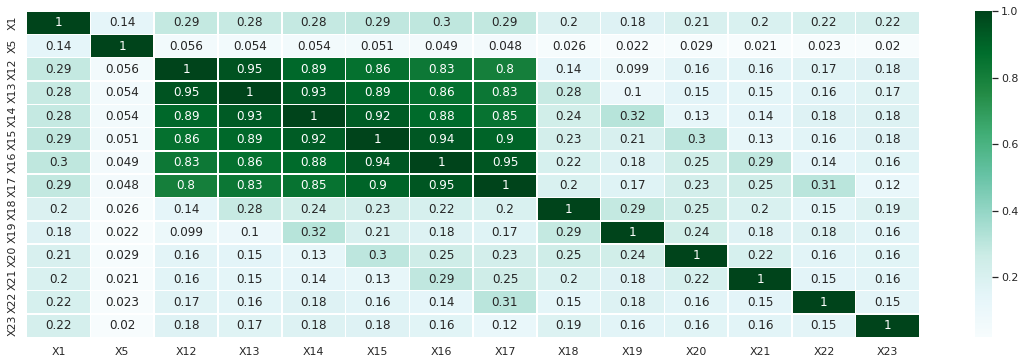

In [ ]:
#podemos hacerlo un poco más amigable con un mapa de calor

sns.set(rc={'figure.figsize':(20,6)}) 
sns.heatmap(round(df1.corr(),3), annot = True, cmap= 'BuGn', linewidths= 0.5)
plt.show()

In [ ]:
#el análisis de componentes principales es bastante sensible a la diferencia de escalas entre variables, por lo que primero hay que escalar 
#y aplicar el método de PCA
pcs = PCA()
pcs.fit(preprocessing.scale(df1.dropna(axis=0))) 

PCA()

In [ ]:
#Para una lectura más fácil de la información, guardamos los indocadores relevantes en el dataframe resumen_df

resumen_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de varianza axplicada': pcs.explained_variance_ratio_,
                             'varianza acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })
resumen_df = resumen_df.transpose()
resumen_df.columns = ['PC{}'.format(i) for i in range(1, len(resumen_df.columns) + 1)]
resumen_df.round(2) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16,0.15
Proporción de varianza axplicada,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00,0.00
varianza acumulada,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00,1.00


In [ ]:
#Con la tabla anterior podemos ver que si utilizamos los primeros 5-7 componentes estaríamos recogiendo entre el 75-87% de la varianza original
#sin embargo, es importante ver cualés de las variables aportan más a cada componente

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=resumen_df.columns,
                                index=df1.columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146
X5,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753
X12,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159
X13,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455
X14,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170
X15,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488
X16,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572
X17,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893
X18,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663
X19,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849


In [ ]:
#Para leer de una mejor manera podemos extraer solo las 5 variables más importantes de cada componente
pcsComponents_df.PC1.nlargest(5)

X15    0.391561
X16    0.388508
X14    0.388267
X13    0.383257
X17    0.380675
Name: PC1, dtype: float64

In [ ]:
#si observamos, aquí se encuentran las variables de X13-X17, lo cuál era de esperarse dado que son las variables con el monto de los estados de cuenta de meses consecutivos
#Si pedimos que se muestren 2 variables más, se observa que X12 también es importante para este primer componente,
pcsComponents_df.PC1.nlargest(7)

X15    0.391561
X16    0.388508
X14    0.388267
X13    0.383257
X17    0.380675
X12    0.372452
X1     0.165467
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.nlargest(5)

X19    0.408370
X20    0.392302
X18    0.383181
X21    0.349614
X23    0.323539
Name: PC2, dtype: float64

In [ ]:
#al igual que con las variables X13-X17, pasa lo mismo con las variables X19-X23
#Si pedimos que se muestren 3 variables más, se observa que X1 y X18 también son importantes para este segundo componente,
pcsComponents_df.PC2.nlargest(8)

X19    0.408370
X20    0.392302
X18    0.383181
X21    0.349614
X23    0.323539
X22    0.303908
X1     0.300798
X5     0.072029
Name: PC2, dtype: float64

In [ ]:
pcsComponents_df.PC3.nlargest(5)

X19    0.201028
X18    0.173883
X20    0.122200
X21    0.062358
X14    0.034734
Name: PC3, dtype: float64

In [ ]:
pcsComponents_df.PC4.nlargest(5)

X18    0.362104
X19    0.345707
X5     0.339083
X20    0.244634
X15    0.074763
Name: PC4, dtype: float64

In [ ]:
pcsComponents_df.PC5.nlargest(5)

X23    0.659221
X18    0.225630
X19    0.148667
X14    0.113784
X13    0.083170
Name: PC5, dtype: float64

In [ ]:
pcsComponents_df.PC6.nlargest(5)

X22    0.602374
X19    0.408358
X14    0.099222
X5     0.071416
X17    0.069259
Name: PC6, dtype: float64

In [ ]:
pcsComponents_df.PC7.nlargest(5)

X20    0.785238
X15    0.126488
X1     0.111146
X23    0.025592
X22    0.014278
Name: PC7, dtype: float64

Podemos observar que a partir del tercer componente las variables que más aportan a estos son las mismas que en el primer y segundo componente.

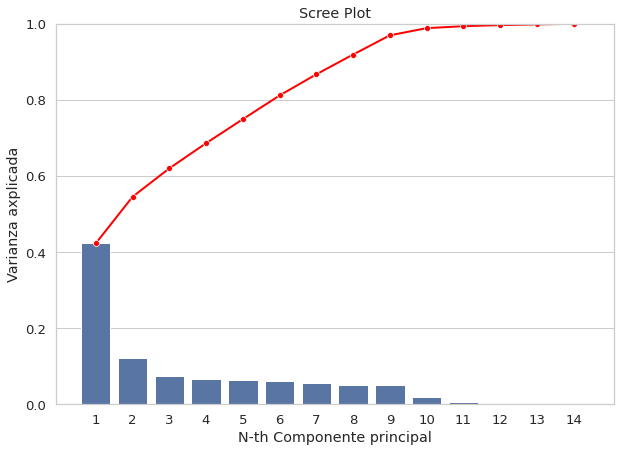

In [ ]:
#La siguiente gráfica muestra de manera amigable cuando la línea de varianza acumulada deja de tener una pendiente importante 
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'red', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 6
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Componente principal')
plt.ylabel('Varianza axplicada')
plt.ylim(0, 1)
plt.show()

# Parte 1: Ejercicio guiado 

## Paso 1: 
Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos. Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

**Basándonos en la gráfica, pareceria que se requieren 9 compoenntes  para explicar alrededor del 97% de la varianza original de los datos, sin embargo, a partir del 6to componente ya se exlica alrededor del 80% de la variacipon de los datos.**

#Paso 2: 
Interprete cada componente principal en términos de las variables originales.
Examine la magnitud y la dirección de los coeficientes de las variables originales.

**La primer componente principal es la de las variables de "Amount of bill statement":**
* **X15, X16 y X14 con magnitudes de 0.39; X13 y X17 con magnitud de 0.38
y X12 con 0.37.**

**La segunda componente principal es la de "Amount of previous payment":.**
* **X19 con magnitud de 0.41, X20 con 0.39, X18 0.38, X21 0.35, X23 0.32
y X22 y X1 con 0.30**

**La tercera y cuarta componente parecerían estár más ligadas a las variables X18-X20**
* **X19 0.20, X18 0.17 y X20 0.12 para la tercer componente y para la cuarta
X18 0.362, X19 0.35, X5 0.34 y X20 0.24**

**Mientras que la 5ta, 6ta y 7ma parecían estar ligadas en su mayoría a las variables X23, X22 y X20 (0.66, 0.60 y 0.79 respectivamente)**

#Paso 3: 
Identifique valores atípicos. Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

gráfica de X1


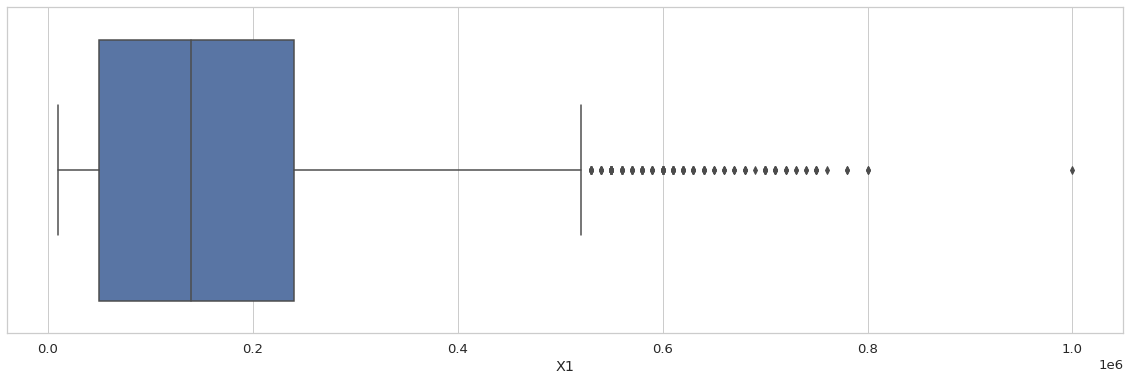

gráfica de X5


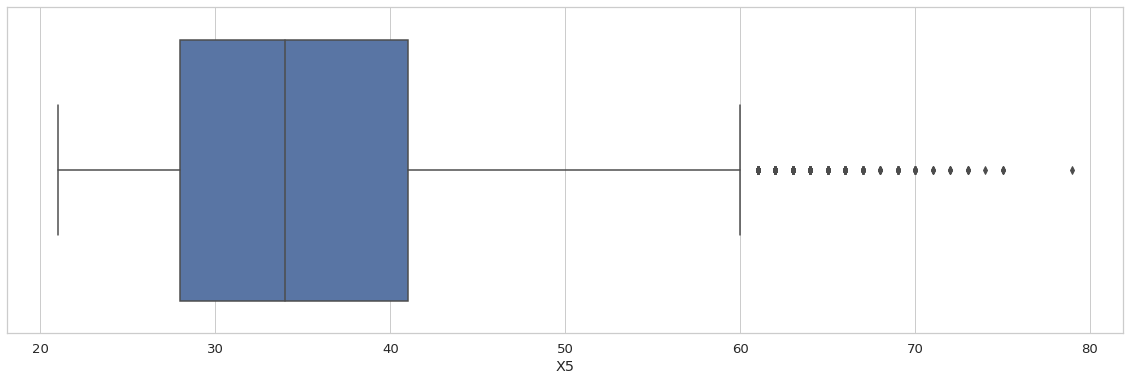

gráfica de X12


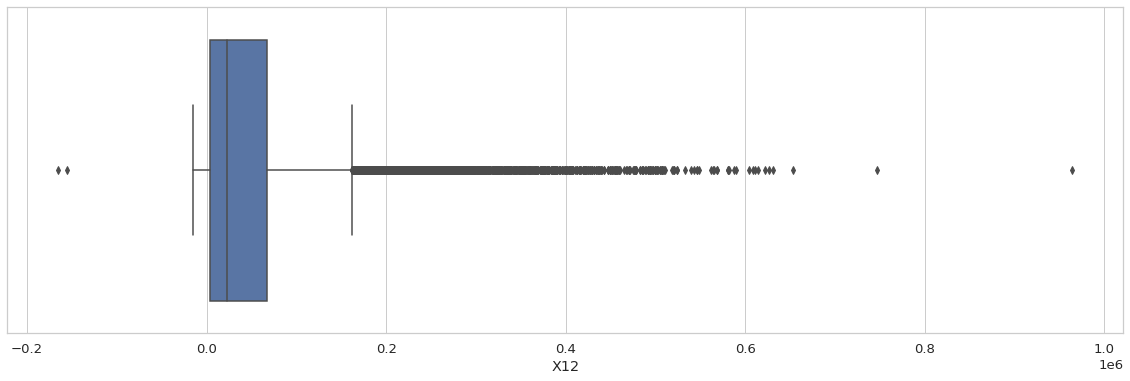

gráfica de X13


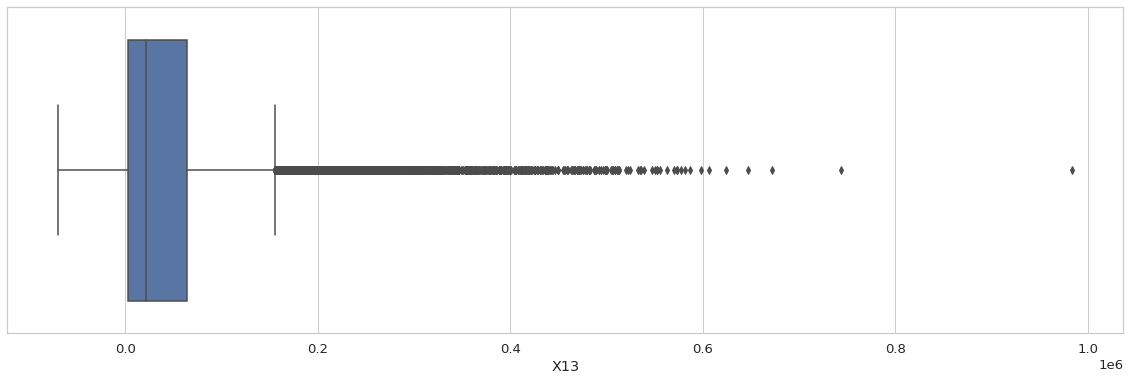

gráfica de X14


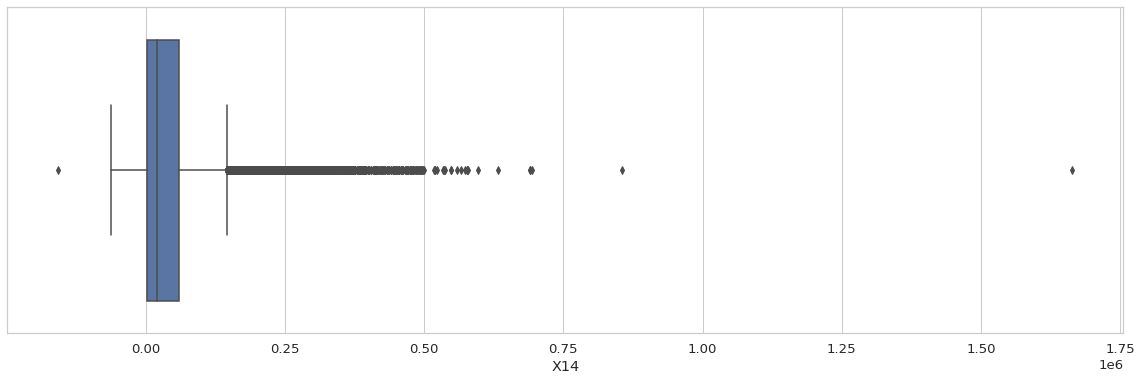

gráfica de X15


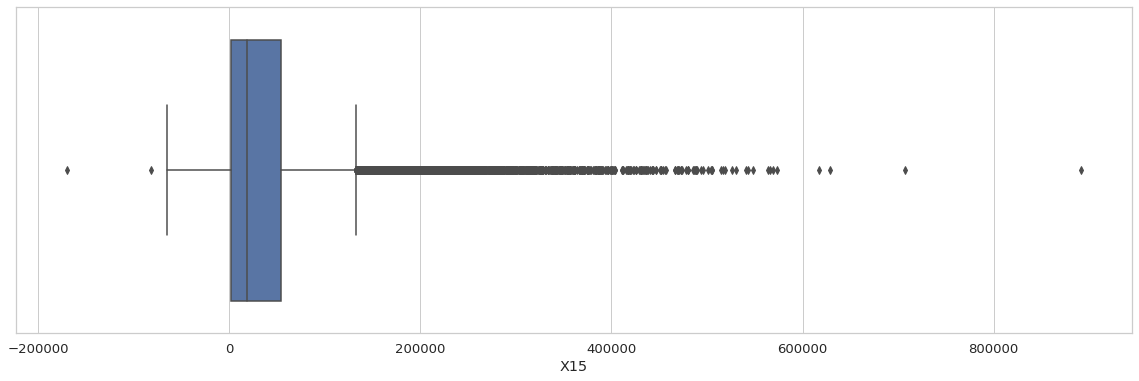

gráfica de X16


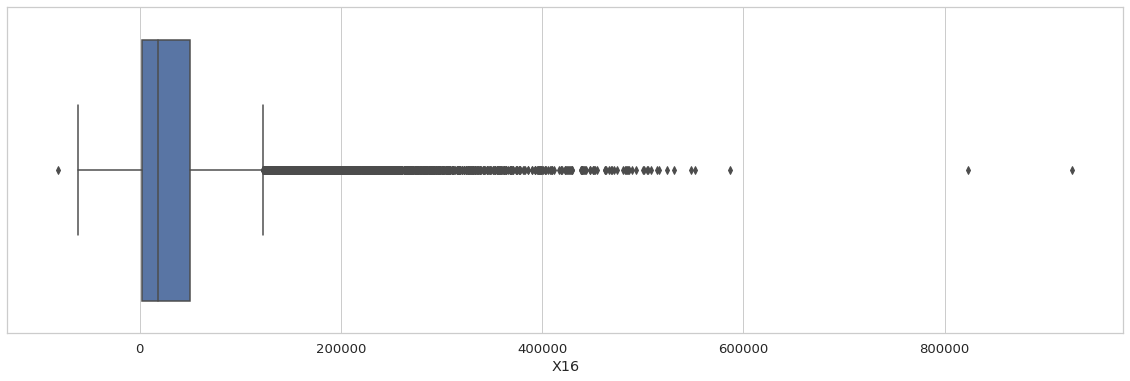

gráfica de X17


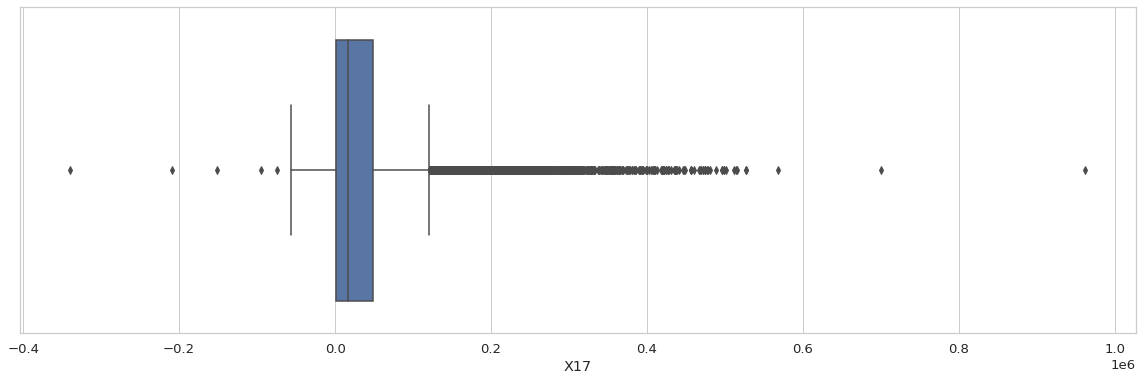

gráfica de X18


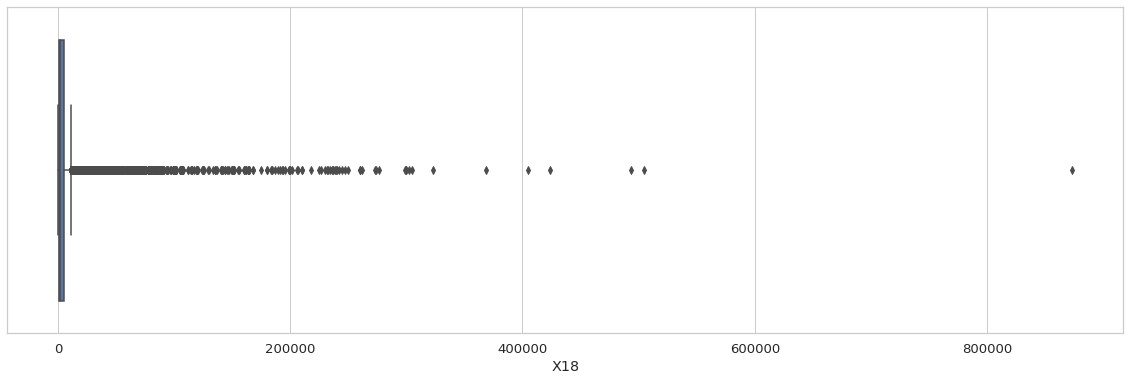

gráfica de X19


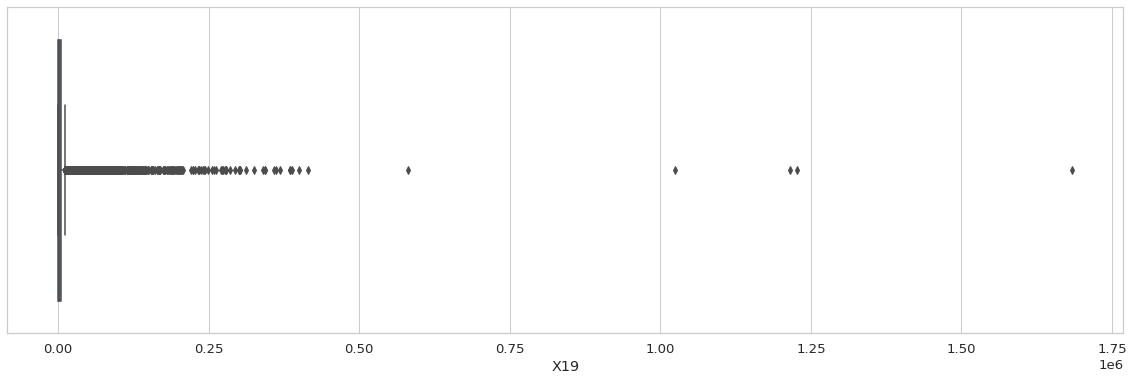

gráfica de X20


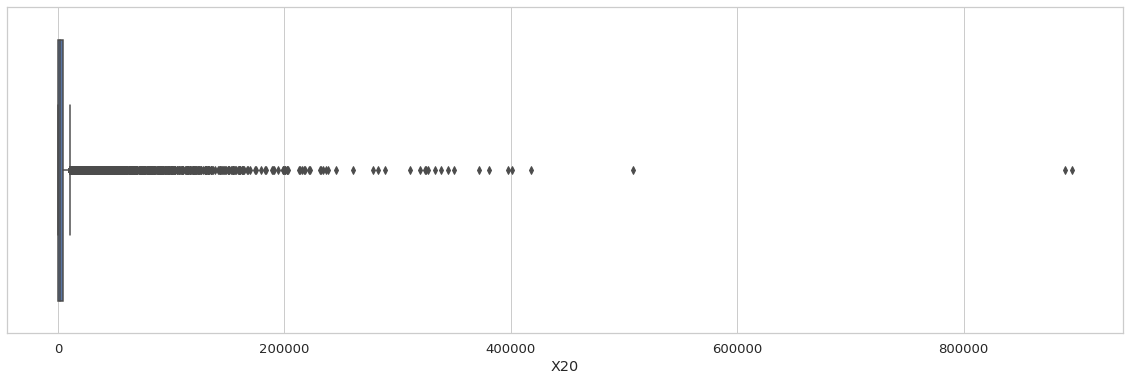

gráfica de X21


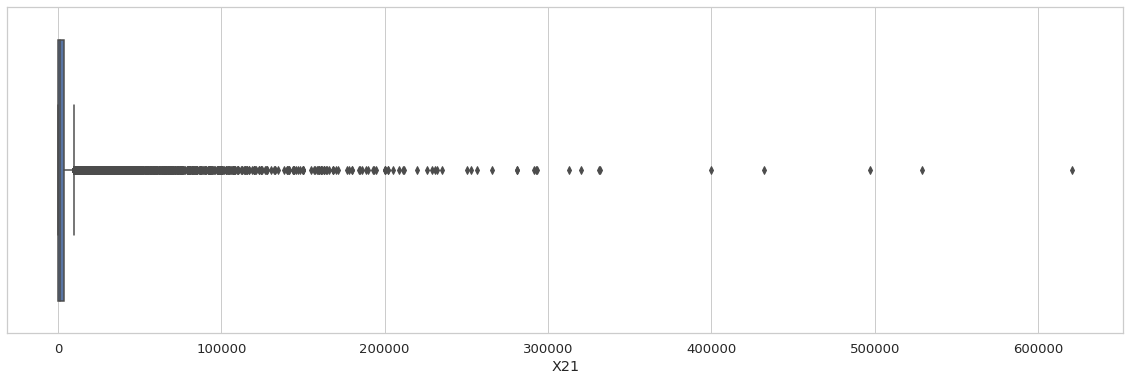

gráfica de X22


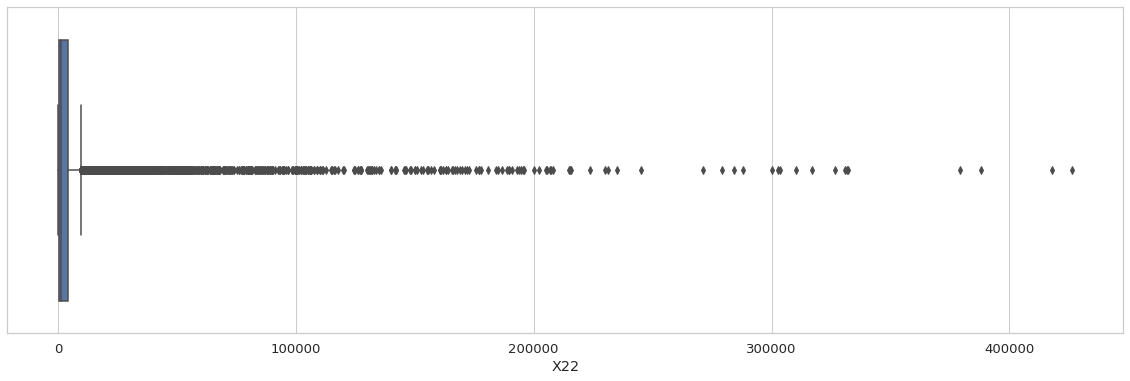

gráfica de X23


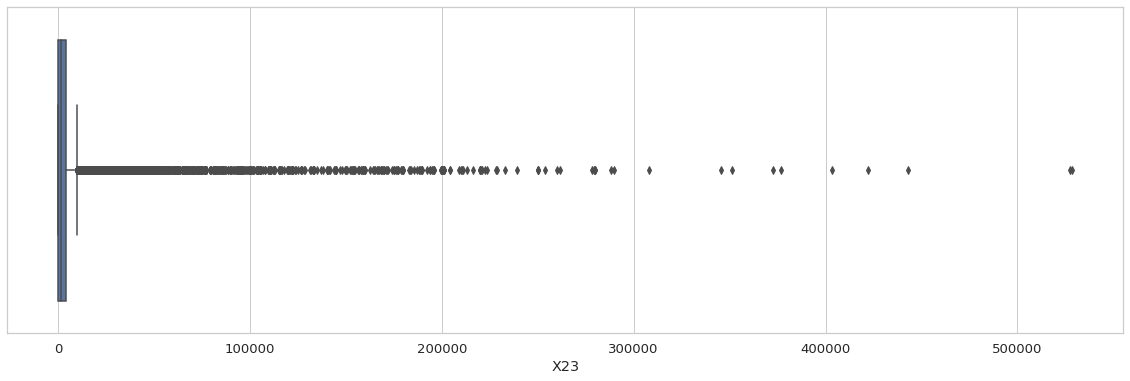

In [ ]:
for var in df1.columns:
  plt.figure(figsize = (20,6))
  sns.boxplot(x = df1[var])
  print("gráfica de " + df1[var].name)
  plt.show()

In [ ]:
#se observa que prácticamente en todas las variables analizadas existe la presencia de valores atípicos.

#Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

##¿Cuál es el número de componentes mínimo y por qué?
**En mi opinión basatría con tomar las primeras 6 ya que el objetivo es reducir la dimencionalidad y además con esas 6 se explica alrededor del 80% de la variación de los datos originales. Podríamos usar hasta la 9na componente que es cuando la pendiente deja de estar inlcinada pero con esas 3 componentes extra solo ganamos una cobertura adicional de 10%.**

##¿Cuál es la variación de los datos que representan esos componentes?
**Estos primeros 6 componentes explican el 80% de la variación original de los datos**

##¿Cuál es la pérdida de información después de realizar PCA?
**Si se utilizan los primeros 6 componentes se pierde alrededor del 20% de la información de la variación de los datos originales**

#De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
**Los componentes principales son el 1 y el 2. En el primer componente principal la variable más importante es X15, si bien, X16, X14, X13 y X17 tienen casi la misma relevancia, en cambio X5 es la variable menos relevante dentro de esta componente.



In [ ]:
print("las 5 variables más relevantes dentro del primer componente son: ") 
print(pcsComponents_df.PC1.nlargest(5))
print("las variables menos relevantes dentro del primer componente es: ")
print(pcsComponents_df.PC1.nsmallest(1))

las 5 variables más relevantes dentro del primer componente son: 
X15    0.391561
X16    0.388508
X14    0.388267
X13    0.383257
X17    0.380675
Name: PC1, dtype: float64
las variables menos relevantes dentro del primer componente son: 
X5    0.032784
Name: PC1, dtype: float64


##¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
**Es cierto que cuando estamos recolectando datos para algún análisis es normal querer tener el mayor número de variables posible. Sin embargo, si tomamos demasiadas será más difícil determinar relaciones entre estas. También es probable que algunas de estas variables midan lo mismo, es decir, que exista una correlación entre ellas En este sentido el análisis PCA es importante cuando tenemos una cantidad importante de variables y queremos reducir la dimensionalidad de la base ya sea intentando evitar duplicidad de medición de algunas variables, o bien, para que el computo de información sea más eficiente.**